# Réseaux de neurones avec Scikit Learn

La bibliothèque **SKLearn** propose une implémentation simple des réseaux de neurones type MLP (*Multi Layer Perceptron*). On va essayer de l'utiliser afin de reconnaitre des chiffres à partir d'images des chiffres manuscrites issues du dataset MNIST. 


In [1]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt

import random as rnd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neural_network import MLPClassifier

## Lecture du dataset

On commence par charger le dataset à partir de la plateforme ***OpennML***.  

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(70000, 784) (70000,)


In [3]:
X.sample()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
23894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Le dataset comporte 70 000 exemples d'images. Les images sont représentées pixel par pixel. Chaque colonne représente ainsi un point dans l'image. 

Chaque pixel ne comporte qu'une seule valeur de 0 à 255 car les images sont en noir en blanc (on a donc le niveau de gris, entre 0 et 255).

On peut donc laisser de côté la structure en colonnes propre aux *DataFrames* Pandas et extraire juste les valeurs (*pixels*) dans un tableau **Numpy** (qu'on utilisera à la place du *DataFrame* Pandas). 

Du même pour y, on a des catégories correspondant aux chiffres (de ***'0' à '9'***). On va donc le convertir en numéro entier (de ***0 à 9***). 

In [4]:
X = X.values
print('X :',type(X), X.shape)

y = y.astype(int).values
print('y', type(y), y.shape)

X : <class 'numpy.ndarray'> (70000, 784)
y <class 'numpy.ndarray'> (70000,)


Maintenant on peut essayer d'afficher quelques images du dataset avec *Matplotlib*.

D'abord, on va prendre un exemple de chaque catégorie (0 à 9), puis on va prendre plusieurs exemples d'une mête catégorie. 

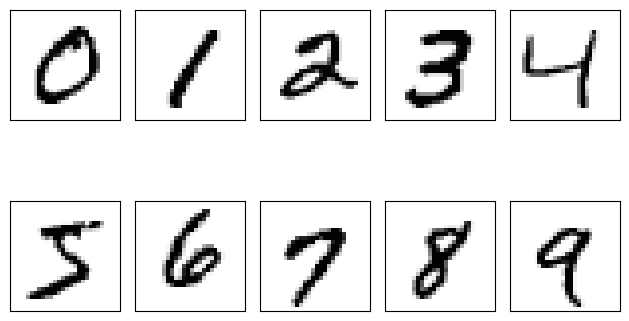

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=5)

ax = ax.flatten() # pour transformer notre tableau bidimensionnel en un tableau unidimensionnel

# on va regarder la 1ère image de chaque chiffre, dans un petit carré de 28x28 
for i in range(10) : # i va de 0 à 9 (inclus)
    
    img = X[y == i][0].reshape(28,28)
    ax[i].imshow(img,cmap='Greys')
    
    #on enlève les labels des axes x et y dans le graphique
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout() #pour afficher l'image plus compacte
plt.show()


Ensuite on va essayer de prendre un chiffre au hasard et afficher 25 exemples du même chiffre. 

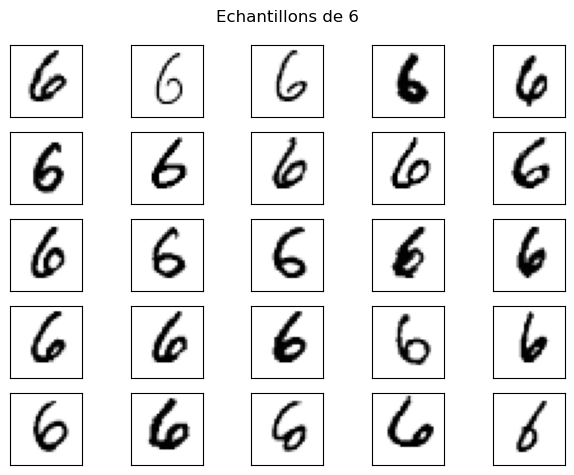

In [6]:
fig, ax = plt.subplots(nrows=5, ncols=5)

ax = ax.flatten()
n = rnd.randint(0,9)  # on choisit au hasard un chiffre 

# on donne un titre à l'ensemble de subplots
plt.suptitle('Echantillons de {}'.format(n))

for i in range(25) : # on va prendre 5x5 exemples
    
    img = X[y == n][i].reshape(28,28)
    ax[i].imshow(img,cmap='Greys')
    
    #on enlève les labels des axes x et y dans le graphique
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout() #pour afficher l'image plus compacte
plt.show()

## Séparation du dataset en test et train

Comme toujours avec la classification, on va séparer le **X** et le **y** en ***train*** et ***test***.

In [7]:
print ('min:',X.min(), 'max:', X.max())

min: 0.0 max: 255.0


Les valeurs vont de 0 à 255. On a donc toutes les valeurs dans les mêmes échelles. 

On peut quand-même penser à les normaliser pour n'avoir que des valeurs entre 0 et 1. 

In [8]:
X = X / 255.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print('train :',x_train.shape, y_train.shape)
print('test :',x_test.shape, y_test.shape)

train : (56000, 784) (56000,)
test : (14000, 784) (14000,)


## Création du modèle

On peut maintenant créer et entrainer le modèle avec les données de ***train***. 

On va utiliser pour cela un petit réseau de 2 niveaux de 50 neurones chaque. 

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(50, 50), 
                    max_iter=150,
                    verbose=True)
clf.fit(x_train, y_train)


Iteration 1, loss = 0.51386971
Iteration 2, loss = 0.21528325
Iteration 3, loss = 0.16667348
Iteration 4, loss = 0.13420801
Iteration 5, loss = 0.11271924
Iteration 6, loss = 0.09856822
Iteration 7, loss = 0.08624063
Iteration 8, loss = 0.07684756
Iteration 9, loss = 0.06815253
Iteration 10, loss = 0.06216871
Iteration 11, loss = 0.05608564
Iteration 12, loss = 0.05241374
Iteration 13, loss = 0.04569354
Iteration 14, loss = 0.04319492
Iteration 15, loss = 0.03831719
Iteration 16, loss = 0.03620902
Iteration 17, loss = 0.03351767
Iteration 18, loss = 0.02978434
Iteration 19, loss = 0.02678507
Iteration 20, loss = 0.02474491
Iteration 21, loss = 0.02408252
Iteration 22, loss = 0.02080868
Iteration 23, loss = 0.02098854
Iteration 24, loss = 0.01873159
Iteration 25, loss = 0.01848639
Iteration 26, loss = 0.01590489
Iteration 27, loss = 0.01320885
Iteration 28, loss = 0.01347598
Iteration 29, loss = 0.01121984
Iteration 30, loss = 0.01030423
Iteration 31, loss = 0.00924101
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=150, verbose=True)

## Evaluation

Une fois entrainé, on peut désomais évaluer le modèle. 

Pour cela, on peut utiliser la méthode ***score*** propre à la classe **MLPClassifier** ou utiliser la méthode ***predict*** et toutes les métriques habituelles qu'on utilisait déjà dans la classification (ex.: *confusion matrice*, *accuracy*, etc.)

In [11]:
clf.score(x_test,y_test)


0.9757142857142858

In [12]:
y_test_pred = clf.predict(x_test)

In [13]:
rep = classification_report(y_true=y_test, y_pred=y_test_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1366
           1       0.99      0.98      0.99      1716
           2       0.97      0.98      0.98      1398
           3       0.97      0.97      0.97      1407
           4       0.98      0.98      0.98      1354
           5       0.97      0.96      0.96      1249
           6       0.98      0.98      0.98      1386
           7       0.98      0.98      0.98      1418
           8       0.96      0.97      0.97      1361
           9       0.97      0.96      0.97      1345

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



Text(0.5, 1.0, 'Confusion matrix')

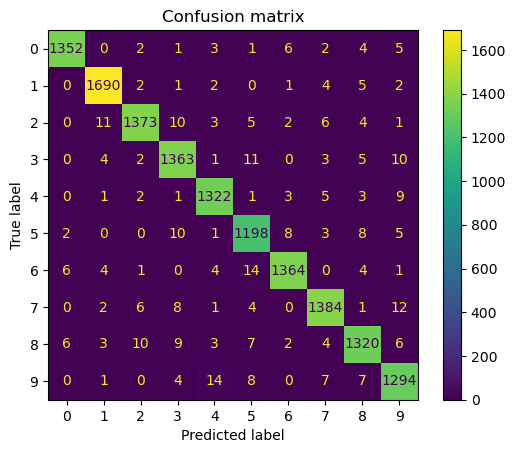

In [14]:
cm = confusion_matrix(y_test_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix')

On va essayer de visualiser certaines images et leur prédiction (ce que le modèle a identifié comme étant le chiffre).  

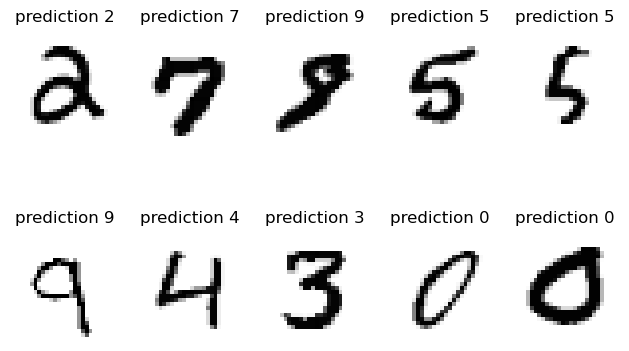

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=5)
ax = ax.flatten() # pour transformer notre tableau bidimensionnel en un tableau unidimensionnel

nblin = len(x_test) # on trouve le nombre d'échantillons du x_test

for i in range(10) :  # on a 10 positions pour afficher des chiffres
    n = rnd.randint(0,nblin)
    ax[i].imshow(x_test[n].reshape(28,28),cmap='Greys')
    ax[i].set_title ('prediction {}'.format(y_test_pred[n]))
    ax[i].axis('off')

plt.tight_layout()
plt.show()